In [2]:
# здесь собраны импорты всех нужных библиотек
from collections import Counter
# удобная библиотека для генерации словарей и проч
import matplotlib.pyplot as plt
# графики
import scipy
# основная функция для построения аппроксимаций
from scipy.optimize import curve_fit
# матфункции, операции с массивами и проч
import numpy as np
# операции с таблицами
import pandas as pd


# Достаём данные

In [3]:
# создём словарь
# {кол-во штаммов : кол-во ортологов, которые встречаются у данного кол-ва штаммов}
# то есть коодинаты Х и У для нашей кривой

dic = {}
lst = []
# first line in file is extra

iffirst = True
with open('myproject.proteinortho', 'r') as file:  # на основе выдачи протеинорто
    for line in file:
        if iffirst:
            iffirst = False
        else:
            words = line.split("\t")  # разделяем по табам
            if len(words) > 3:  # убираем все лишние слова
                lst.append(int(words[0]))  # добавляем в список все ортологи
dic = Counter(lst)  # считаем количество одинаковых ортологов
print(dic)  # cмотрим, что у нас получилось


Counter({86: 1571, 85: 677, 3: 475, 2: 471, 84: 325, 4: 235, 83: 209, 5: 173, 6: 154, 9: 151, 82: 136, 81: 112, 8: 103, 12: 98, 11: 86, 80: 71, 7: 71, 79: 67, 10: 60, 15: 60, 69: 52, 14: 51, 77: 47, 13: 47, 68: 44, 56: 41, 78: 38, 76: 37, 17: 37, 74: 36, 70: 35, 18: 34, 75: 33, 71: 33, 73: 33, 72: 30, 65: 28, 62: 26, 20: 25, 61: 25, 30: 23, 19: 22, 60: 22, 16: 22, 59: 22, 64: 21, 21: 21, 67: 21, 66: 18, 54: 17, 53: 17, 58: 17, 55: 16, 32: 15, 29: 14, 26: 14, 23: 14, 52: 13, 34: 13, 31: 13, 49: 12, 63: 12, 25: 12, 28: 12, 57: 12, 37: 12, 50: 11, 51: 10, 44: 10, 24: 9, 48: 9, 22: 9, 47: 9, 35: 9, 33: 8, 40: 8, 46: 7, 27: 6, 41: 5, 36: 5, 38: 4, 43: 4, 42: 4, 39: 3, 45: 1})


## По коодинатам строим кривую

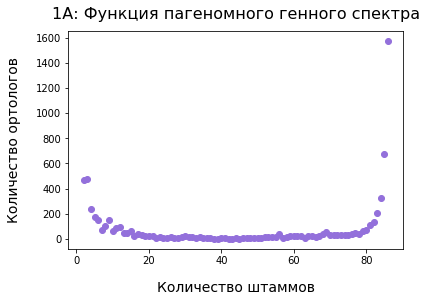

In [5]:
# делаем списки из словаря, чтобы постоить график и оценить визуально результат

lists = sorted(dic.items())  # сортируем по ключам, получаем 2 списка коодинат

x, y = zip(*lists)   # разделем их

plt.scatter(x, y, color='mediumpurple')  # строим фиолетовый график
plt.title("1А: Функция пагеномного генного спектра", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.show()


## Аппроксимируем

In [6]:
 в этой ячейке собраны функции

x_data = np.array(x)  # переводим в массивы так как дальше работаем с нампаем
y_data = np.array(y)


# формула суммы трёх экспонент
def func_exp(x, a1, b1, a2, b2, a3, b3):
    return np.exp(x * a1 + b1) + \
           np.exp(x * a2 + b2) +  \
           np.exp(x * a3 + b3)


# фомула суммы двух степенных функций
def func_pwr(x, a1, b1, a2, b2):
    return a1 * np.power(x + 1, b1) + \
           a2 * np.power(87 - x, b2)


/Users/tatianalevuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


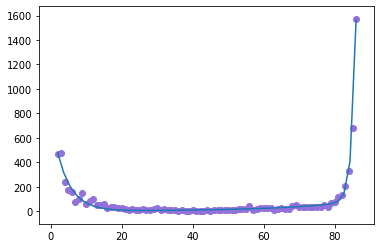

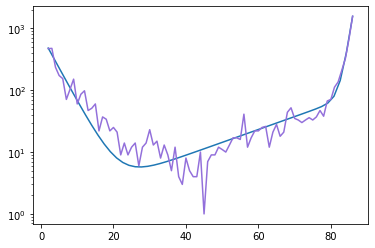

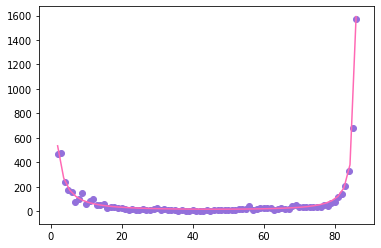

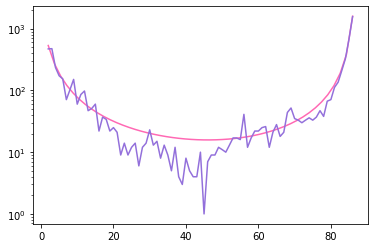

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [8]:
# аппроксимируем для экспоненты
popt_exp, pcov = curve_fit(func_exp, x, y)
# аппрокимируем для степенной функции
# подбираем параметры, чтобы органичить множество возможных подстановок
p0 = [-1, 1, -1, 1]
popt_pwr, pcov = curve_fit(func_pwr, x, y, p0)
# находим координаты для аппроксимаций
x_app = np.linspace(min(x), max(x))
y_app_exp = func_exp(x_app, *popt_exp)
# рисуем
plt.plot(x_app, y_app_exp)
plt.scatter(x, y, color='mediumpurple')
plt.show()
plt.semilogy(x_app, y_app_exp)
plt.semilogy(x, y, color='mediumpurple')
plt.show()
# повторяем всё для степенной
x_app = np.linspace(min(x), max(x))
y_app_pwr = func_pwr(x_app, *popt_pwr)
# рисуем
plt.plot(x_app, y_app_pwr, color='hotpink')
plt.scatter(x, y, color='mediumpurple')
plt.show()
plt.semilogy(x_app, y_app_pwr, color='hotpink')
plt.semilogy(x, y, color='mediumpurple')
plt.show()
# смотрим, насколько наши аппроксимации отличаются от кривой
y_observed = y_data
y_predicted_exp = func_exp(x, *popt_exp)
y_predicted_pwr = func_pwr(x, *popt_pwr)
N_params_exp = len(popt_exp)
N_params_pwr = len(popt_pwr)

print(IC(y_observed,
         y_predicted_exp,
         N_params_exp))

print(IC(y_observed,
         y_predicted_pwr,
         N_params_pwr))
# смотрим на графике на разницу
plt.plot(y_observed)
plt.plot(y_predicted_exp)
plt.show()
print(y)
print(y_app_exp)
for k in sorted(dic.keys()):
    print(k, dic[k])


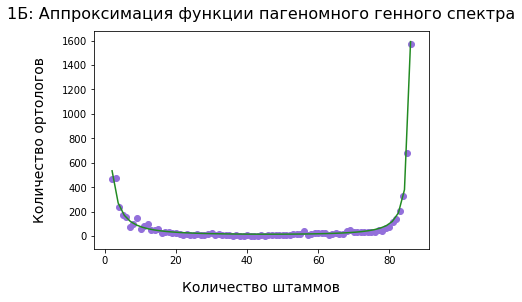

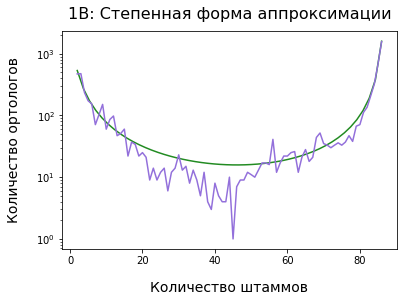

In [11]:

plt.plot(x_app, y_app_pwr, color='forestgreen')
plt.scatter(x, y, color='mediumpurple')
plt.title("1Б: Аппроксимация функции пагеномного генного спектра",
          fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.show()
plt.semilogy(x_app, y_app_pwr, color='forestgreen')
plt.semilogy(x, y, color='mediumpurple')
plt.title("1В: Степенная форма аппроксимации", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.show()

In [ ]:
# смотрим на параметры аппроксимации для экпоненты
popt_exp, pcov = curve_fit(func_exp, x_data, y_data)
popt_exp


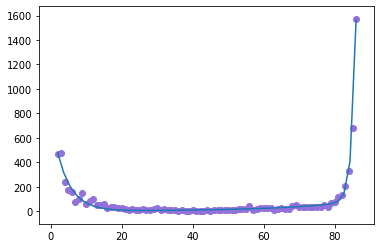

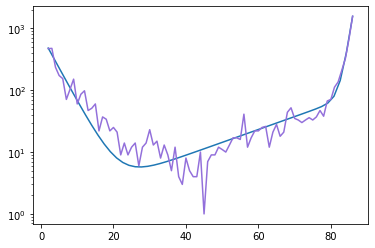

In [7]:
# смотрим отличия глазами для экспоненты
x_app = np.linspace(min(x_data), max(x_data))
y_app_exp = func_exp(x_app, *popt_exp)

plt.plot(x_app, y_app_exp)
plt.scatter(x, y, color='mediumpurple')
plt.show()
plt.semilogy(x_app, y_app_exp)
plt.semilogy(x, y, color='mediumpurple')
plt.show()


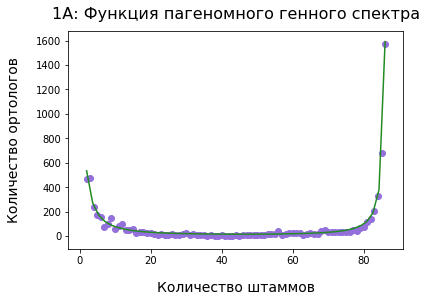

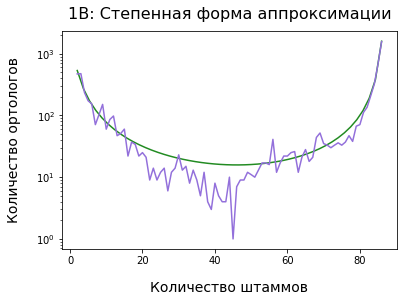

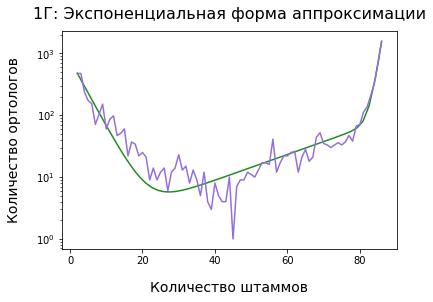

In [13]:
plt.plot(x_app, y_app_pwr, color='forestgreen')
plt.scatter(x, y, color='mediumpurple')
plt.title("1А: Функция пагеномного генного спектра", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.savefig('ris1a.pdf')
plt.show()
plt.semilogy(x_app, y_app_pwr, color='forestgreen')
plt.semilogy(x, y, color='mediumpurple')
plt.title("1В: Степенная форма аппроксимации", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.savefig('ris1b.pdf')
plt.show()
plt.semilogy(x_app, y_app_exp, color='forestgreen')
plt.semilogy(x, y, color='mediumpurple')
plt.title("1Г: Экспоненциальная форма аппроксимации", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.savefig('ris1c.pdf')
plt.show()


In [8]:
# повторение для степенной
p0 = [-1, 1, -1, 1]
popt_pwr, pcov = curve_fit(func_pwr, x_data, y_data, p0)
print(popt_pwr)


[ 2.80549549e+03 -1.51362277e+00  1.58876859e+03 -1.44119603e+00]


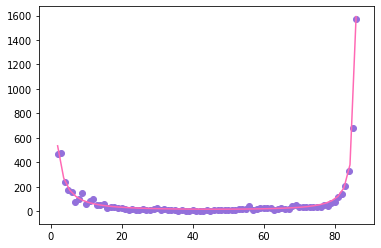

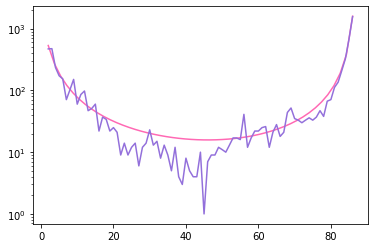

In [9]:
# графики
x_app = np.linspace(min(x_data), max(x_data))
y_app_pwr = func_pwr(x_app, *popt_pwr)

plt.plot(x_app, y_app_pwr, color='forestgreen')
plt.scatter(x, y, color='mediumpurple')
plt.show()
plt.semilogy(x_app, y_app_pwr, color='forestgreen')
plt.semilogy(x, y, color='mediumpurple')
plt.show()


In [10]:
# считаем информационные критерии - аик и бик

def IC(array_observed,
       array_predicted,
       N_params):
    # проверям всё ли хорошо с нашими массивами
    N_points = len(array_observed)
    if len(array_observed) != len(array_predicted):
        raise ValueError
    # считаем статистические характеристики
    sse = sum((array_observed - array_predicted)**2)
    AIC = 2*N_params + N_points*np.log(sse)
    BIC = N_params*np.log(N_points) + N_points*np.log(sse)
    return {"AIC": AIC,
            "BIC": BIC}


[ 471  475  235  173  154   71  103  151   60   86   98   47   51   60
   22   37   34   22   25   21    9   14    9   12   14    6   12   14
   23   13   15    8   13    9    5   12    4    3    8    5    4    4
   10    1    7    9    9   12   11   10   13   17   17   16   41   12
   17   22   22   25   26   12   21   28   18   21   44   52   35   33
   30   33   36   33   37   47   38   67   71  112  136  209  325  677
 1571] [ 479.46881401  374.79098056  293.06913197  229.27406069  179.47860943
  140.61619117  110.29222256   86.63687631   68.19009879   53.81182276
   42.61185453   33.89512441   27.11893413   21.85957238   17.7862457
   14.64072194   12.2214343    10.37106881    8.96687181    7.91308143
    7.13501778    6.57446829    6.18608442    5.9345683     5.79247594
    5.73850218    5.75614173    5.83264386    5.95819648    6.12528935
    6.32821718    6.56269193    6.82554051    7.11446909    7.42787947
    7.76472618    8.1244053     8.50666817    8.91155452    9.33934077


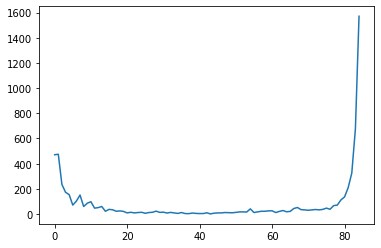

In [13]:
# применяем эту функцию на данных
y_observed = y_data
y_predicted_exp = func_exp(x_data, *popt_exp)
y_predicted_pwr = func_pwr(x_data, *popt_pwr)
N_params_exp = len(popt_exp)
N_params_pwr = len(popt_pwr)
print(y_observed, y_predicted_exp, N_params_exp)
print('For exp: ', IC(y_observed,
                      y_predicted_exp,
                      N_params_exp))

print('For power: ', IC(y_observed,
                        y_predicted_pwr,
                        N_params_pwr))
# и строим график
plt.plot(y_observed)


In [2]:
# набор функций для посторения аппроксимаций
# для случайного количества штаммов

def func_exp(x, a1, b1, a2, b2, a3, b3):
    return np.exp(x * a1 + b1) + \
           np.exp(x * a2 + b2) +  \
           np.exp(x * a3 + b3)


def func_pwr_r(x, a1, b1, a2, b2):
    return a1 * np.power(x + 1, b1) + \
           a2 * np.power(11 - x, b2)


def func_pwr(x, a1, b1, a2, b2):
    return a1 * np.power(x + 1, b1) + \
            a2 * np.power(x_data.ndim - x, b2)


def quality_metrics(array_observed,
                    array_predicted,
                    N_params):

    N_points = len(array_observed)
    if len(array_observed) != len(array_predicted):
        raise ValueError

    sse = sum((array_observed - array_predicted)**2)
    AIC = 2*N_params + N_points*np.log(sse)
    BIC = N_params*np.log(N_points) + N_points*np.log(sse)
    return {"AIC": AIC,
            "BIC": BIC,
            "SSE": sse,
            "RMSD": sse/N_points}


In [43]:
# функция, которая выбирает случайные штаммы из выдачи протеинорто


def rand_strains(filename, numb_str):
    # читаем файл и стрим таблицу, из которой будем вытаскивать
    df = pd.read_csv(filename, sep="\t", engine='python')
    df = df.drop(['# Species', 'Genes', 'Alg.-Conn.'], axis=1)
    df = df.T
    df = df.sample(n=numb_str)
    # вытаскиваем рандомные штаммы и считаем ортологи
    lst_r = []
    df = df.replace('*', np.nan)
    for column in df:
        count_nan = df[column].isnull().sum().sum()
        lst_r.append(count_nan)
    dic_r = Counter(lst_r)
    lists_r = sorted(dic_r.items())
    # создаём массивы-координаты У-кривой
    x_r, y_r = zip(*lists_r)
    x_data_r = np.array(x_r)
    y_data_r = np.array(y_r)
    popt_exp_r, pcov_r = curve_fit(func_exp, x_data_r, y_data_r)
    # аппроксимируем
    p0 = [-1, 1, -1, 1]
    popt_pwr_r, pcov_r = curve_fit(func_pwr_r, x_data_r, y_data_r, p0)
    # формируем массивы с координатами для аппроксимаций
    x_app_r = np.linspace(min(x_data_r), max(x_data_r))
    y_app_exp_r = func_exp(x_app_r, *popt_exp_r)

    x_app_r = np.linspace(min(x_data_r), max(x_data_r))
    y_app_pwr_r = func_pwr_r(x_app_r, *popt_pwr_r)
    # считаем статистические характеристики
    y_observed_r = y_data_r
    y_predicted_exp_r = func_exp(x_data_r, *popt_exp_r)
    y_predicted_pwr_r = func_pwr_r(x_data_r, *popt_pwr_r)
    N_params_exp_r = len(popt_exp_r)
    N_params_pwr_r = len(popt_pwr_r)
    # смотрим, что получилось
    print('For power function: ',
          quality_metrics(y_data_r,
                          y_predicted_pwr_r,
                          N_params_pwr_r))
    print('For exp function: ',
          quality_metrics(y_data_r,
                          y_predicted_exp_r,
                          N_params_exp_r))


In [45]:
rand_strains('myproject.proteinortho', numb_str=10)


For power function:  {'AIC': 131.99186016358144, 'BIC': 133.58344125477493, 'SSE': 78589.02106847361, 'RMSD': 7144.456460770328}
For exp function:  {'AIC': 133.73180391525153, 'BIC': 136.11917555204175, 'SSE': 63992.9134366828, 'RMSD': 5817.537585152982}


/Users/tatianalevuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/Users/tatianalevuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in power
  
